
--- FACE VERIFICATION ---


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 299ms/step
Comparing:
face_db/atharvaa1.jpg
face_db/atharvaa2.jpg
Result: ❌ Not Match | Distance: 0.4276
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step

Comparing:
face_db/atharvaa1.jpg
face_db/atharvaa3.jpg
Result: ✅ Match | Distance: 0.3454

--- FACE IDENTIFICATION ---
There are  5  representations found in  representations_vgg_face.pkl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/st ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
find function lasts  0.36319446563720703  seconds
Test Image: face_db/atharvaa3.jpg
Best Match: face_db/atharvaa3.JPG
Distance: 0.0


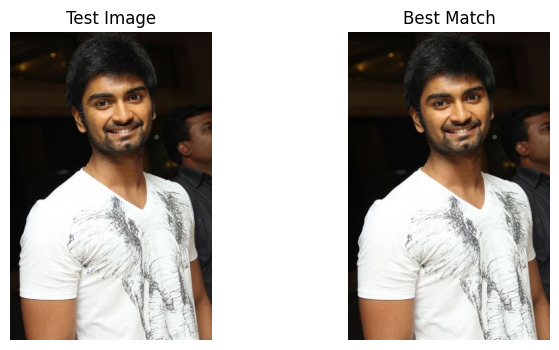

In [13]:
# -----------------------------
# 🔹 PATCH FOR DEEPFACE + KERAS 3
# -----------------------------
import tensorflow as tf
from tensorflow.keras import layers

# Patch LocallyConnected2D
if not hasattr(layers, "LocallyConnected2D"):
    class LocallyConnected2D(layers.Layer):
        def __init__(self, *args, **kwargs):
            super().__init__()
        def call(self, inputs):
            return inputs
    layers.LocallyConnected2D = LocallyConnected2D

# -----------------------------
# Patch find_input_shape for Keras 3
# -----------------------------
import deepface.commons.functions as functions
def patched_find_input_shape(model):
    return 224, 224
functions.find_input_shape = patched_find_input_shape

# -----------------------------
# 🔹 IMPORTS
# -----------------------------
from deepface import DeepFace
import os
import matplotlib.pyplot as plt
from PIL import Image

# -----------------------------
# 🔹 FACE VERIFICATION
# -----------------------------
def face_verification():
    print("\n--- FACE VERIFICATION ---")

    img1 = r"face_db/atharvaa1.jpg"
    img2 = r"face_db/atharvaa2.jpg"
    img3 = r"face_db/atharvaa3.jpg"

    # Compare img1 vs img2
    result = DeepFace.verify(img1_path=img1, img2_path=img2, model_name="VGG-Face")
    print(f"Comparing:\n{img1}\n{img2}")
    print("Result:", "✅ Match" if result["verified"] else "❌ Not Match",
          "| Distance:", round(result["distance"], 4))

    # Compare img1 vs img3
    result = DeepFace.verify(img1_path=img1, img2_path=img3, model_name="VGG-Face")
    print(f"\nComparing:\n{img1}\n{img3}")
    print("Result:", "✅ Match" if result["verified"] else "❌ Not Match",
          "| Distance:", round(result["distance"], 4))

# -----------------------------
# 🔹 FACE IDENTIFICATION
# -----------------------------
def face_identification():
    print("\n--- FACE IDENTIFICATION ---")

    db_path = "face_db"  # Database folder

    if not os.path.exists(db_path):
        print(f"[ERROR] Database folder '{db_path}' not found. Please create it and add images.")
        return

    test_img = r"face_db/atharvaa3.jpg"  # Test image

    results = DeepFace.find(img_path=test_img, db_path=db_path, model_name="VGG-Face")

    if results is not None and not results.empty:
        df = results

        # Get best match (lowest distance)
        best_match = df.iloc[0]

        test_identity = test_img
        match_identity = best_match['identity']
        distance = round(best_match['VGG-Face_cosine'], 4)  # use correct column name for distance

        print(f"Test Image: {test_identity}")
        print(f"Best Match: {match_identity}")
        print(f"Distance: {distance}")

        # -----------------------------
        # Visualization
        # -----------------------------
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        axes[0].imshow(Image.open(test_identity))
        axes[0].set_title("Test Image")
        axes[0].axis("off")

        axes[1].imshow(Image.open(match_identity))
        axes[1].set_title(f"Best Match")
        axes[1].axis("off")

        plt.show()
    else:
        print("❌ No match found in the database.")


# -----------------------------
# 🔹 MAIN EXECUTION
# -----------------------------
if __name__ == "__main__":
    face_verification()
    face_identification()